# Homework 1 and 2

Importing necessary libraries.

In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Reading the data from csv file:

In [814]:
data = pd.read_csv("matches.csv")
data.fillna(0)
data.head()
home_goals  = list()
away_goals = list()
home_away_goals = list()

Let's grab the data for only English Premier League which its ID is 148:

In [818]:
x = data['league_id'] == 148
data = data[x]

In [819]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148
6,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,148
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
27,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,148


Assing home team goals and away team goals in seperate lists.

In [820]:
home_goals = data["match_hometeam_score"].tolist()
away_goals = data["match_awayteam_score"].tolist()

Let's see how big our dataset.

In [821]:
data["match_hometeam_score"].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1 to 5161
Data columns (total 1 columns):
match_hometeam_score    618 non-null float64
dtypes: float64(1)
memory usage: 9.8 KB


Let's create another list for results combining home and away goals.

In [823]:
for i in range(618):
    home_away_goals.append(str(home_goals[i]) + "-" + str(away_goals[i]))

Let's see the histogram of home team goals.

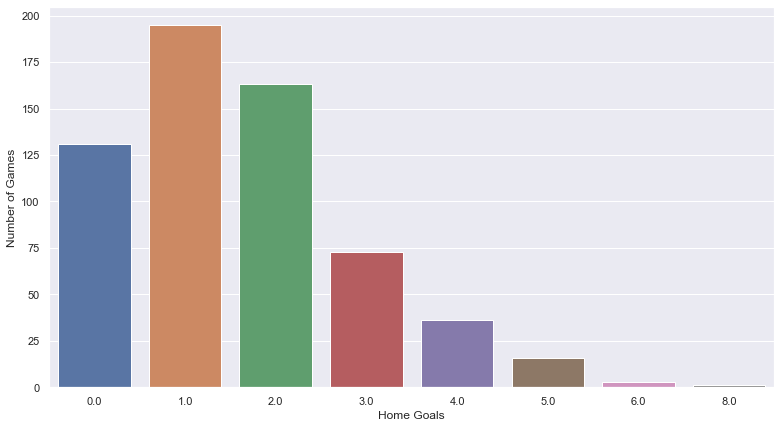

In [824]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
ax = sns.countplot(x=home_goals)
ax.set(xlabel='Home Goals', ylabel='Number of Games')
plt.show()

And away goals:

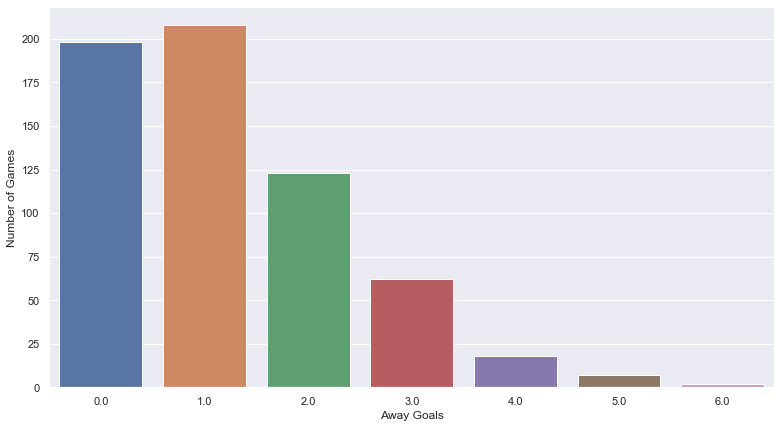

In [825]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
ax = sns.countplot(x=away_goals)
ax.set(xlabel='Away Goals', ylabel='Number of Games')
plt.show()

And which results are more likely to occur in matches:

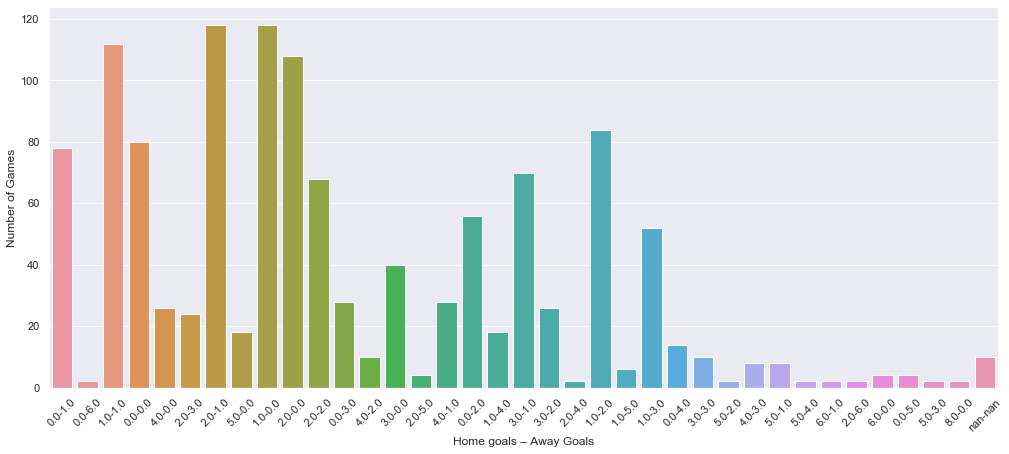

In [826]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x=home_away_goals)
ax.set(xlabel='Home goals – Away Goals', ylabel='Number of Games')
plt.xticks(rotation=45)
plt.show()

It looks like distribution of away goals looks like poisson distribution.

In [250]:
aways = data.match_awayteam_score.dropna().astype(int)
dats = list()
for i in aways:
    dats.append(int(i))

In [827]:
from scipy import stats
from scipy.stats import norm

When we try to plot distribituon :

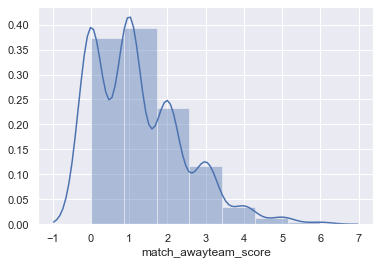

In [831]:
sns.distplot(data.match_awayteam_score.dropna(), bins=7)

# Task 2

In [282]:
books = pd.read_csv("booking.csv")
books.head()

,match_id,time,home_fault,card,away_fault
0,13327,90+3,Can E.,yellow card,NaN
1,13329,29,Holebas J.,yellow card,NaN
2,13329,40,Doucoure A.,yellow card,NaN
3,13331,33,Cabaye Y.,yellow card,NaN
4,13331,50,Puncheon J.,yellow card,NaN


In [863]:
bets = pd.read_csv("bets.csv")
bets.head()

,match_id,odd_bookmakers,odd_epoch,variable,value
0,146845,BetOlimp,1486301854,odd_1,1.96
1,151780,10Bet,1486314920,odd_1,2.15
2,151780,18bet,1486314920,odd_1,2.17
3,151780,1xBet,1486314920,odd_1,2.20
4,151780,5Dimes,1486314920,odd_1,2.23


**odd_x : Draw**

**odd_1 : Home Wins**

**odd_2 : Away Wins**

Let's create another column which contains the probabilities that has been given by bookmakers using <br><br> $$\frac {1}{P(value)}$$

In [864]:
prob = list()
for i in bets.value:
    try:
        temp = 1/i
        prob.append(temp)
    except:
        temp = 0
        prob.append(temp)

bets["possibility"] = prob

In [865]:
bets["possibility"].head()

0    0.510204
1    0.465116
2    0.460829
3    0.454545
4    0.448430
Name: possibility, dtype: float64

### Lets create another column into our matches data to see if a match ended in a draw or no:

In [866]:
data["results"] =  data["match_awayteam_score"] == data["match_hometeam_score"]
data.results.head()

1     False
5     False
6      True
7     False
27     True
Name: results, dtype: bool

In [867]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148,False
6,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,148,True
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
27,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,148,True


In [868]:
bets.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204
1,151780,10Bet,1486314920,odd_1,2.15,0.465116
2,151780,18bet,1486314920,odd_1,2.17,0.460829
3,151780,1xBet,1486314920,odd_1,2.20,0.454545
4,151780,5Dimes,1486314920,odd_1,2.23,0.448430


We filter the Bets data to get only draw bets. And add a new column named **draw** to which contain a boolean data according to the match result, Draw or No. We make it all False for now.

In [892]:
x = bets['variable'] == 'odd_x'
bets["draw"] = False
bets_draw = bets[x]

In [893]:
bets_draw.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,draw
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
36,151780,10Bet,1486314920,odd_x,3.15,0.317460,False
37,151780,18bet,1486314920,odd_x,3.12,0.320513,False
38,151780,1xBet,1486314920,odd_x,3.24,0.308642,False
39,151780,5Dimes,1486314920,odd_x,3.19,0.313480,False


In [873]:
data.results.value_counts()

False    493
True     135
Name: results, dtype: int64

In [875]:
count = int()
for index, row in bets_draw.iterrows():
    id = row["match_id"]
    match = data.query(f'match_id == {id}')
    if len(match) > 0:
        if match.results.values[0]:
            count+=1
            bets_draw.at[index,'draw'] = True

In [880]:
count

3783

In [881]:
bets_draw.draw.value_counts()

False    140999
True       3783
Name: draw, dtype: int64

In [885]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [895]:
indexes = list()
with tqdm(total = len(bets_draw)) as pbar:
    for index,row in bets_draw.iterrows():
        id = row['match_id']
        match = data.query(f'match_id == {id}')
        if len(match) == 0:
            indexes.append(index)
        elif len(match) > 0:
            bets_draw.at[index,'draw'] = True
        pbar.update(1)

bets_draw = bets_draw.drop(indexes)

In [896]:
bets_draw.draw.value_counts()

True    19660
Name: draw, dtype: int64

We put 4 different dataset of draw bets from 4 different Bookmakers into a python list named **makers**

In [477]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()  # Get a list of bookmakers.
#type(bookmakers)

makers = list()

for i in bookmakers[:4]:  #For the first 4 bookmakers in the list bookmakers. We get their data into makers list.
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers.append(bets[x][bookmaker])

Lets see the first element of the list makers to have a better understanding of what we done.

First element of makers list contains data of BetOlimp bookmakers draw data.

In [478]:
makers[0].head(15)

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,draw
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
42,151780,BetOlimp,1486314920,odd_x,3.15,0.317460,False
59,151781,BetOlimp,1486314941,odd_x,3.28,0.304878,False
166,147990,BetOlimp,1486710451,odd_x,3.23,0.309598,False
183,148000,BetOlimp,1486710493,odd_x,2.99,0.334448,False
200,148001,BetOlimp,1486710502,odd_x,3.22,0.310559,False
378,147991,BetOlimp,1486797015,odd_x,3.51,0.284900,False
395,147992,BetOlimp,1486797022,odd_x,5.03,0.198807,False
412,147993,BetOlimp,1486797032,odd_x,4.59,0.217865,False
429,147995,BetOlimp,1486710471,odd_x,3.54,0.282486,False


When we need to check if a match ended in a draw or no from its match_id it is more simple to have a dataset like below:

In [473]:
match_results = data.iloc[:,[2,-1]]
match_results.head()

,match_id,results
0,41196,True
1,13331,False
2,17683,False
3,17684,False
4,17682,False


### 4 Bookmakers that we are Going to Analyse their Draw Possiblities

In [538]:
for i in makers:
    print(i.odd_bookmakers.unique())
    continue

['BetOlimp']
['10Bet']
['18bet']
['1xBet']


Now let's turn the "draw" column in each element of makers list which belongs to different bookamkers to True or False if correnponding match ended in draw.

To do that we need to check match ID's from the small dataset we created called match_results

In [480]:
for index,rows in makers[0].iterrows():
    id = rows['match_id']
    if match_results.query(f'match_id == {id}').results.values[0]:
        makers[0].at[index,'draw'] = True

In [499]:
for index,rows in makers[1].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[1].at[index,'draw'] = True

In [501]:
for index,rows in makers[2].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[2].at[index,'draw'] = True

In [502]:
for index,rows in makers[3].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[3].at[index,'draw'] = True

### Splitting Probabilities into Bins for the Bookmaker BetOlimp

Now we split datasets into bins by their probability of draw.

### **Probabibility Range of Bins**

- ( 0.0 - 0.10 ]
- ( 0.10 - 0.20 ]
- ( 0.20 - 0.30 ]
- ( 0.30 - 0.40 ]

In [581]:
bins_for_betolimp = list()

In [623]:
x = makers[0][np.logical_and(makers[0]['possibility'] > 0.0 , makers[0]['possibility'] <= 0.10)]
x2 = makers[0][np.logical_and(makers[0]['possibility'] > 0.10 , makers[0]['possibility'] <= 0.20)]
x3 = makers[0][np.logical_and(makers[0]['possibility'] > 0.20 , makers[0]['possibility'] <= 0.30)]
x4 = makers[0][np.logical_and(makers[0]['possibility'] > 0.30 , makers[0]['possibility'] <= 0.40)]


x5 = makers[0][np.logical_and(makers[0]['possibility'] > 0.40 , makers[0]['possibility'] <= 0.50)]
x6 = makers[0][np.logical_and(makers[0]['possibility'] > 0.50 , makers[0]['possibility'] <= 0.60)]
x7 = makers[0][np.logical_and(makers[0]['possibility'] > 0.60 , makers[0]['possibility'] <= 0.70)]
x8 = makers[0][np.logical_and(makers[0]['possibility'] > 0.70 , makers[0]['possibility'] <= 0.80)]

Note that there are no probability of draw biger than 0.40 for some datasets.

In [624]:
bins_for_betolimp = list()
bins_for_betolimp.append(x)
bins_for_betolimp.append(x2)
bins_for_betolimp.append(x3)
bins_for_betolimp.append(x4)
bins_for_betolimp.append(x5)

In [630]:
x = makers[1][np.logical_and(makers[1]['possibility'] > 0.0 , makers[1]['possibility'] <= 0.10)]
x2 = makers[1][np.logical_and(makers[1]['possibility'] > 0.10 , makers[1]['possibility'] <= 0.20)]
x3 = makers[1][np.logical_and(makers[1]['possibility'] > 0.20 , makers[1]['possibility'] <= 0.30)]
x4 = makers[1][np.logical_and(makers[1]['possibility'] > 0.30 , makers[1]['possibility'] <= 0.40)]


x5 = makers[1][np.logical_and(makers[1]['possibility'] > 0.40 , makers[1]['possibility'] <= 0.50)]
x6 = makers[1][np.logical_and(makers[1]['possibility'] > 0.50 , makers[1]['possibility'] <= 0.60)]
x7 = makers[1][np.logical_and(makers[1]['possibility'] > 0.60 , makers[1]['possibility'] <= 0.70)]
x8 = makers[1][np.logical_and(makers[1]['possibility'] > 0.70 , makers[1]['possibility'] <= 0.80)]

In [631]:
bins_for_10bet = list()

bins_for_10bet.append(x)
bins_for_10bet.append(x2)
bins_for_10bet.append(x3)
bins_for_10bet.append(x4)
bins_for_10bet.append(x5)

In [633]:
x = makers[2][np.logical_and(makers[2]['possibility'] > 0.0 , makers[2]['possibility'] <= 0.10)]
x2 = makers[2][np.logical_and(makers[2]['possibility'] > 0.10 , makers[2]['possibility'] <= 0.20)]
x3 = makers[2][np.logical_and(makers[2]['possibility'] > 0.20 , makers[2]['possibility'] <= 0.30)]
x4 = makers[2][np.logical_and(makers[2]['possibility'] > 0.30 , makers[2]['possibility'] <= 0.40)]


x5 = makers[2][np.logical_and(makers[2]['possibility'] > 0.40 , makers[2]['possibility'] <= 0.50)]
x6 = makers[2][np.logical_and(makers[2]['possibility'] > 0.50 , makers[2]['possibility'] <= 0.60)]
x7 = makers[2][np.logical_and(makers[2]['possibility'] > 0.60 , makers[2]['possibility'] <= 0.70)]
x8 = makers[2][np.logical_and(makers[2]['possibility'] > 0.70 , makers[2]['possibility'] <= 0.80)]

In [634]:
bins_for_18bet = list()

bins_for_18bet.append(x)
bins_for_18bet.append(x2)
bins_for_18bet.append(x3)
bins_for_18bet.append(x4)
bins_for_18bet.append(x5)

In [636]:
x = makers[3][np.logical_and(makers[3]['possibility'] > 0.0 , makers[3]['possibility'] <= 0.10)]
x2 = makers[3][np.logical_and(makers[3]['possibility'] > 0.10 , makers[3]['possibility'] <= 0.20)]
x3 = makers[3][np.logical_and(makers[3]['possibility'] > 0.20 , makers[3]['possibility'] <= 0.30)]
x4 = makers[3][np.logical_and(makers[3]['possibility'] > 0.30 , makers[3]['possibility'] <= 0.40)]


x5 = makers[3][np.logical_and(makers[3]['possibility'] > 0.40 , makers[3]['possibility'] <= 0.50)]
x6 = makers[3][np.logical_and(makers[3]['possibility'] > 0.50 , makers[3]['possibility'] <= 0.60)]
x7 = makers[3][np.logical_and(makers[3]['possibility'] > 0.60 , makers[3]['possibility'] <= 0.70)]
x8 = makers[3][np.logical_and(makers[3]['possibility'] > 0.70 , makers[3]['possibility'] <= 0.80)]

In [637]:
bins_for_1xbet = list()

bins_for_1xbet.append(x)
bins_for_1xbet.append(x2)
bins_for_1xbet.append(x3)
bins_for_1xbet.append(x4)
bins_for_1xbet.append(x5)

### Estimated Probability of Draws For BetOlimp

When we divide the number of matches ended in draw in the $Bin_i$ with the total number of matches in $Bin_i$: <br>

$$Estimated\space Probability\space of\space Draw = \frac{Number\space of\space Matches\space Ended\space In\space Draw\space in\space Bin_i}{Number\space of\space Matches\space In\space Bin_i}$$

In [626]:
print("\nBetOlimp Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_betolimp:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :        " + str(round(len(i[k])/len(i),2)))
    except:
        pass
    


BetOlimp Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :        0.0
(0.1 - 0.2]        :        0.19
(0.2 - 0.3]        :        0.24
(0.3 - 0.4]        :        0.27


### Estimated Probability of Draws For 10Bet

In [632]:
print("\n10Bet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_10bet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


10Bet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.09
(0.1 - 0.2]        :         0.12
(0.2 - 0.3]        :         0.24
(0.3 - 0.39]        :         0.28


### Estimated Probability of Draws For 18Bet

In [635]:
print("\n18Bet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_18bet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


18Bet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.1
(0.11 - 0.2]        :         0.13
(0.2 - 0.3]        :         0.24
(0.3 - 0.4]        :         0.29


### Estimated Probability of Draws For 1xBet

In [642]:
print("\n1xBet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_1xbet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


1xBet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.04
(0.1 - 0.2]        :         0.16
(0.2 - 0.3]        :         0.24
(0.3 - 0.39]        :         0.3
(0.4 - 0.41]        :         0.0


Since we are done with the draw boolen column, we can dop it:

In [ ]:
bets = bets.drop(['draw'], axis=1)

Now let's take a look at the home win bets:

In [747]:
#bets = bets.drop(['away_win'], axis=1)
x = bets['variable'] == 'odd_1'
bets["home_win"] = False
bets[x].head(10)

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
1,151780,10Bet,1486314920,odd_1,2.15,0.465116,False
2,151780,18bet,1486314920,odd_1,2.17,0.460829,False
3,151780,1xBet,1486314920,odd_1,2.20,0.454545,False
4,151780,5Dimes,1486314920,odd_1,2.23,0.448430,False
5,151780,bet-at-home,1486314920,odd_1,2.12,0.471698,False
6,151780,bet365,1486314920,odd_1,2.20,0.454545,False
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,False
8,151780,Betrally,1486314920,odd_1,2.15,0.465116,False
9,151780,BetVictor,1486314920,odd_1,2.20,0.454545,False


In [748]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()
type(bookmakers)

makers_1 = list()

for i in bookmakers[:4]:
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers_1.append(bets[x][bookmaker])

In [749]:
bets.query(f'match_id == 146845')

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
70,146845,BetOlimp,1486301854,odd_2,3.65,0.273973,False


In [750]:
makers_1[0].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,False
24,151781,BetOlimp,1486314941,odd_1,2.95,0.338983,False
111,147990,BetOlimp,1486710451,odd_1,2.14,0.467290,False
128,148000,BetOlimp,1486710493,odd_1,2.50,0.400000,False


In [751]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
0,7109,7097,41196,1505559600,Finished,0,Levante,Valencia,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,468,True
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195,False
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195,False
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195,False


We extract the part of the data which has home team wins. Since we dont have a column that tells us the result, we compare goals of home teams and away teams and add the matches with bigger home team goals to the new dataset called **home_wins**

In [752]:
home_wins = data[data['match_hometeam_score'] > data['match_awayteam_score']]
home_wins.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195,False
8,2642,2650,13448,1505570400,Finished,0,Bristol City,Derby,4.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,149,False
10,2645,2648,13453,1505570400,Finished,0,Middlesbrough,QPR,3.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,149,False
13,2653,2638,13454,1505570400,Finished,0,Millwall,Leeds,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,149,False
14,7110,7115,41313,1505570400,Finished,0,Valladolid,Granada CF,2.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,468,False


In [753]:
for i in makers_1:
    for index,rows in i.iterrows():
        id = rows['match_id']
        if len(home_wins.query(f'match_id == {id}')) > 0:
            i.at[index,'home_win'] = True

In [755]:
bins_for_10bet_1 = list()
bins_for_18bet_1 = list()
bins_for_betolimp_1 = list()
bins_for_1xbet_1 = list()

for i in makers_1:
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == 'BetOlimp':
        while poss <= 0.90:
            bins_for_betolimp_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '10Bet':
        while poss <= 0.90:
            bins_for_10bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '18Bet':
        while poss <= 0.90:
            bins_for_18bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '1xBet':
        while poss <= 0.90:
            bins_for_10bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0

In [757]:
for i in makers_1:
    print(i['odd_bookmakers'].unique().tolist())
    

['BetOlimp']
['10Bet']
['18bet']
['1xBet']


In [730]:
#bets = bets.drop(['home_win'], axis = 1)
x = bets['variable'] == 'odd_2'
bets["away_win"] = False
bets[x].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,away_win
70,146845,BetOlimp,1486301854,odd_2,3.65,0.273973,False
71,151780,10Bet,1486314920,odd_2,3.70,0.270270,False
72,151780,18bet,1486314920,odd_2,3.32,0.301205,False
73,151780,1xBet,1486314920,odd_2,3.88,0.257732,False
74,151780,5Dimes,1486314920,odd_2,3.82,0.261780,False


In [731]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()
type(bookmakers)

makers_2 = list()

for i in bookmakers[:4]:
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers_2.append(bets[x][bookmaker])

In [732]:
away_wins = data[data['match_hometeam_score'] < data['match_awayteam_score']]
away_wins.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195,False
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195,False
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148,False
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False


In [733]:
for i in makers_2:
    for index,rows in i.iterrows():
        id = rows['match_id']
        if len(away_wins.query(f'match_id == {id}')) > 0:
            i.at[index,'away_win'] = True

In [740]:
bins_for_10bet_2 = list()
bins_for_18bet_2 = list()
bins_for_betolimp_2 = list()
bins_for_1xbet_2 = list()

for i in makers_2:
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == 'BetOlimp':
        while poss <= 0.90:
            bins_for_betolimp_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '10Bet':
        while poss <= 0.90:
            bins_for_10bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '18Bet':
        while poss <= 0.90:
            bins_for_18bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '1xBet':
        while poss <= 0.90:
            bins_for_10bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0

In [805]:
makers_1[0].head()
#makers[0].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,True
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,True
24,151781,BetOlimp,1486314941,odd_1,2.95,0.338983,True
111,147990,BetOlimp,1486710451,odd_1,2.14,0.467290,False
128,148000,BetOlimp,1486710493,odd_1,2.50,0.400000,False


In [795]:
home_away = pd.concat([(-makers_2[0]["possibility"]), makers_1[0]["possibility"]])
home_away.head()
                

70    -0.273973
77    -0.275482
94    -0.406504
221   -0.263852
238   -0.335570
Name: possibility, dtype: float64

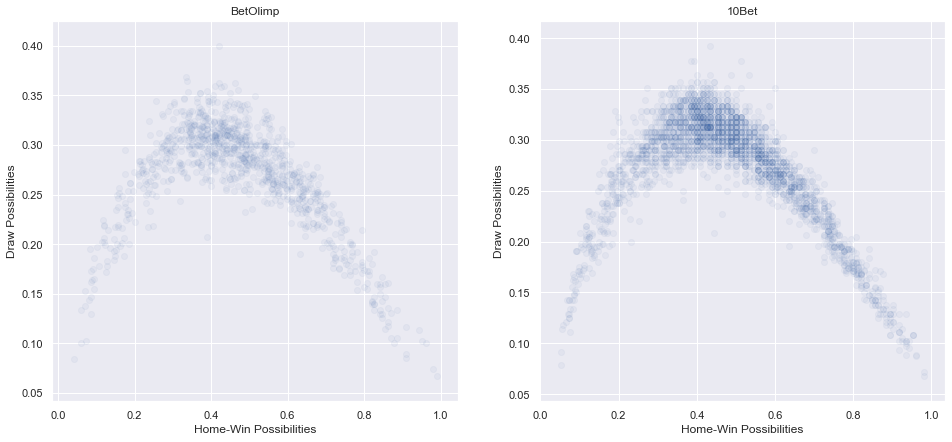

In [807]:


plt.figure(figsize= (16,7))

plt.subplot(1,2,1)
plt.title("BetOlimp")
plt.scatter(makers_1[0]["possibility"], makers[0]["possibility"], alpha = 0.05)
plt.xlabel("Home-Win Possibilities")
plt.ylabel("Draw Possibilities")
plt.subplot(1,2,2)
plt.title("10Bet")
plt.scatter(makers_1[1]["possibility"], makers[1]["possibility"], alpha = 0.05)
plt.xlabel("Home-Win Possibilities")
plt.ylabel("Draw Possibilities")
plt.show()

## Homework 2

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

Column 1 --> Bag Class

Column 2 --> Bag ID

In [7]:
data = pd.read_csv('Musk1.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


## Task 2

### Let's display our 256x256 photo

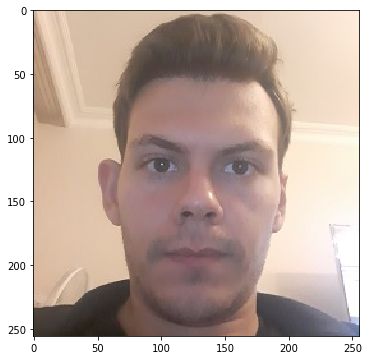

In [176]:
image = cv2.imread('selfie.jpg',1)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (6,6))
plt.imshow(image)

In [158]:
r,g,b = cv2.split(image)

In [160]:
noise_R = np.random.uniform(r.min(),r.max()*0.1, r.size)
noise_G = np.random.uniform(g.min(),g.max()*0.1, g.size)
noise_B = np.random.uniform(b.min(),b.max()*0.1, b.size)

In [161]:
noise_R = noise_R.reshape(256,256)
noise_G = noise_G.reshape(256,256)
noise_B = noise_B.reshape(256,256)

In [162]:
r = r + noise_R
g = g + noise_G
b = b + noise_B

Some pixel values could get bigger than 255, to avoid that, we use clip fuction to limit max of a pixel value: 

In [163]:
r = np.clip(r, a_min = 0, a_max = 255)
g = np.clip(g, a_min = 0, a_max = 255)
b = np.clip(b, a_min = 0, a_max = 255)

In [164]:
img = cv2.merge((r, g, b))

### Noisy Image

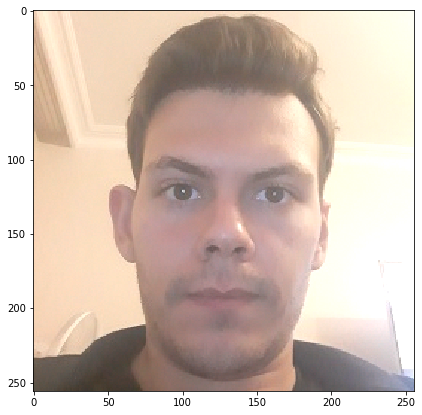

In [173]:
plt.figure(figsize = (7, 7))
img = img.astype(np.uint8)
plt.imshow(img)

### Each channel of the Noisy Image

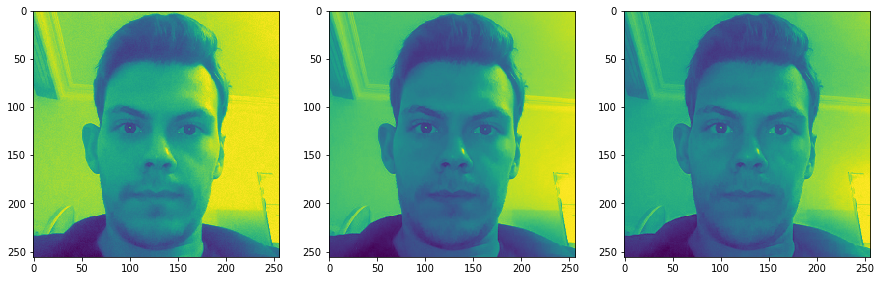

In [135]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
#fig.suptitle('Channels')
ax1.imshow(r)
ax2.imshow(g)
ax3.imshow(b)

### Now lets transform our noisy image to grayscale format:

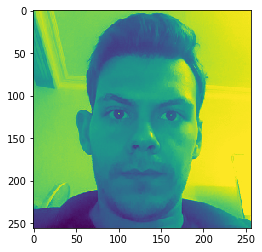

In [175]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [178]:
gray

array([[199, 205, 225, ..., 251, 251, 252],
       [197, 205, 216, ..., 252, 252, 252],
       [192, 204, 208, ..., 252, 252, 251],
       ...,
       [ 79,  79,  80, ..., 157, 157, 158],
       [ 81,  79,  78, ..., 158, 156, 168],
       [ 79,  77,  75, ..., 168, 164, 158]], dtype=uint8)

### Import necessary libraries to implement PCA:

In [180]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
gray = normalize(gray)

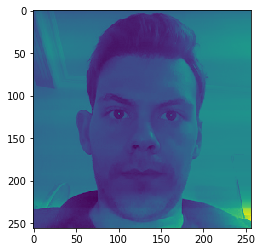

In [187]:
plt.imshow(gray)

In [188]:
pca = PCA(.99)
lower_dimension_data = pca.fit_transform(gray)

In [189]:
lower_dimension_data.shape

(256, 45)

In [190]:
approximation = pca.inverse_transform(lower_dimension_data)
approximation.shape

(256, 256)

In [191]:
approximation = approximation.reshape(-1,32,32)
gray = gray.reshape(-1,32,32)

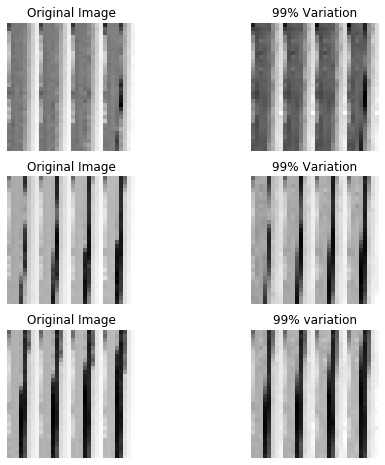

In [192]:
for i in range(0,gray.shape[0]):
    gray[i,] = gray[i,].T
    approximation[i,] = approximation[i,].T
    
fig4, axarr = plt.subplots(3,2,figsize=(8,8))
axarr[0,0].imshow(gray[0,],cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(approximation[0,],cmap='gray')
axarr[0,1].set_title('99% Variation')
axarr[0,1].axis('off')
axarr[1,0].imshow(gray[1,],cmap='gray')
axarr[1,0].set_title('Original Image')
axarr[1,0].axis('off')
axarr[1,1].imshow(approximation[1,],cmap='gray')
axarr[1,1].set_title('99% Variation')
axarr[1,1].axis('off')
axarr[2,0].imshow(gray[2,],cmap='gray')
axarr[2,0].set_title('Original Image')
axarr[2,0].axis('off')
axarr[2,1].imshow(approximation[2,],cmap='gray')
axarr[2,1].set_title('99% variation')
axarr[2,1].axis('off')
plt.show()